# Data Analysis Report

This report explores and analyzes the dataset to uncover patterns, trends, and insights.

## Importing Packages and Reading the Data

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv(r"tae.csv",header=None)
df.head()

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [16]:
df.columns

Index([0, 1, 2, 3, 4, 5], dtype='int64')

## Assigning column name for the data

In [17]:
df.columns=['Language','Course_Instructor','Course','Semester','Class_size','Class_Attribute']

## Checking for NULL values

In [18]:
df.isnull().sum()

Language             0
Course_Instructor    0
Course               0
Semester             0
Class_size           0
Class_Attribute      0
dtype: int64

## Understanding Datatypes, Description and Information of the Data

In [19]:
df.dtypes

Language             int64
Course_Instructor    int64
Course               int64
Semester             int64
Class_size           int64
Class_Attribute      int64
dtype: object

In [20]:
df.describe()

,Language,Course_Instructor,Course,Semester,Class_size,Class_Attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Language           151 non-null    int64
 1   Course_Instructor  151 non-null    int64
 2   Course             151 non-null    int64
 3   Semester           151 non-null    int64
 4   Class_size         151 non-null    int64
 5   Class_Attribute    151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


# Exploratory Data Analysis

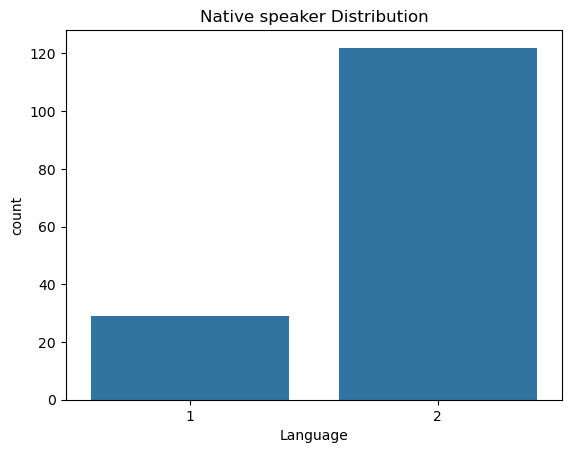

In [38]:
sns.countplot(data=df, x='Language')
plt.title("Native speaker Distribution")
plt.show()

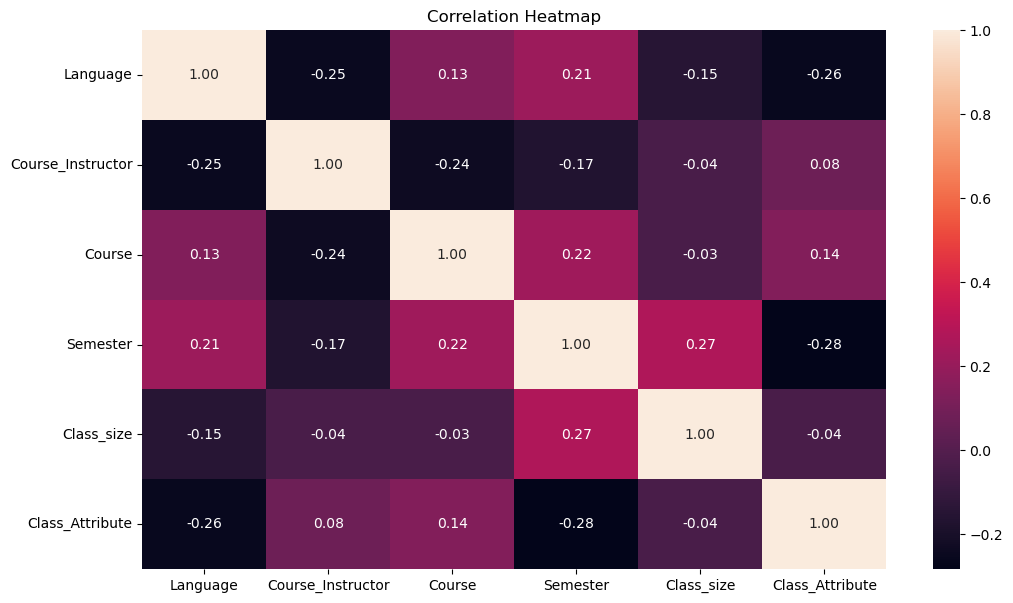

In [39]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

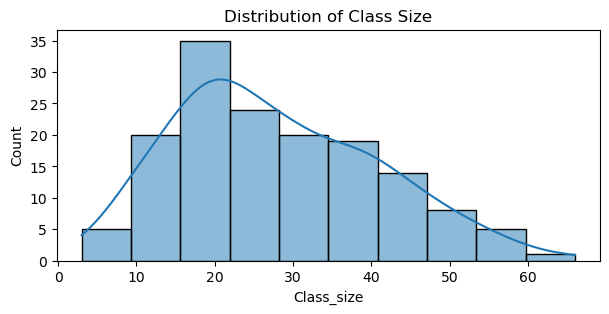

In [41]:
plt.figure(figsize=(7,3))
sns.histplot(df['Class_size'], kde=True)
plt.title("Distribution of Class Size")
plt.show()

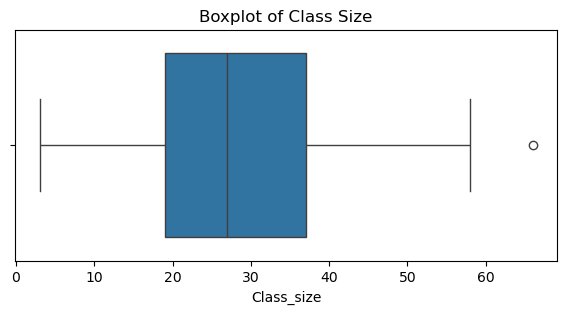

In [42]:
plt.figure(figsize=(7,3))
sns.boxplot(x=df['Class_size'])
plt.title('Boxplot of Class Size')
plt.show()

# Data Encoding
LabelEncoding method is used for this data.

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
df_encoded.head()

,Language,Course_Instructor,Course,Semester,Class_size,Class_Attribute
0,0,22,2,0,13,2
1,1,14,2,0,11,2
2,0,22,2,1,40,2
3,0,4,1,1,27,2
4,1,6,10,1,43,2


In [25]:
X = df_encoded.drop("Class_Attribute", axis=1)
y = df_encoded["Class_Attribute"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Training Models
Algorithms used are:
* Logistic Regression
* KNeighbors Classifier
* Decision Tree Classifier
* Random Forest Classifier
* Support Vector Machine

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Logistic Regression

In [29]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

## K Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

## Decision Tree Classifier

In [30]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

## Random Forest Classifier

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

## Support Vector Machine

In [32]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Evaluation of Models
Evaluating and Plotting the results

In [33]:
def evaluate(model_name, y_test, y_pred):
    print("\n==============================")
    print(model_name)
    print("==============================")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [34]:
evaluate("Logistic Regression", y_test, log_pred)
evaluate("KNN", y_test, knn_pred)
evaluate("Decision Tree", y_test, dt_pred)
evaluate("Random Forest", y_test, rf_pred)
evaluate("SVM", y_test, svm_pred)


Logistic Regression
Accuracy: 0.5434782608695652

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.79      0.58        14
           1       0.56      0.56      0.56        16
           2       0.83      0.31      0.45        16

    accuracy                           0.54        46
   macro avg       0.62      0.55      0.53        46
weighted avg       0.62      0.54      0.53        46


Confusion Matrix:
 [[11  3  0]
 [ 6  9  1]
 [ 7  4  5]]

KNN
Accuracy: 0.391304347826087

Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.50      0.37        14
           1       0.70      0.44      0.54        16
           2       0.33      0.25      0.29        16

    accuracy                           0.39        46
   macro avg       0.44      0.40      0.40        46
weighted avg       0.45      0.39      0.40        46


Confusion Matrix:
 [[ 7  2  5]
 [ 6  7  3]
 [11

In [43]:
results = {
    "Model": ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, log_pred),
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, dt_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, svm_pred)
    ]
}

results_df = pd.DataFrame(results)

In [44]:
results_df

,Model,Accuracy
0,Logistic Regression,0.543478
1,KNN,0.391304
2,Decision Tree,0.652174
3,Random Forest,0.739130
4,SVM,0.347826


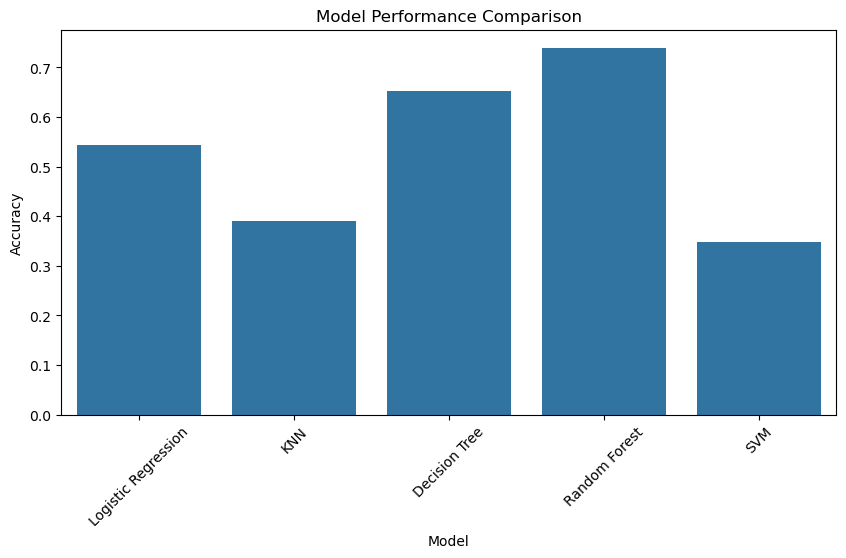

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.show()